<a href="https://colab.research.google.com/github/didhitidasgupta/Microsoft-Project/blob/main/Predicting_Enzyme_Activity.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Task**
Analyze and model the combined dataset to understand the relationship between Temperature, pH, Starch Concentration, and Enzyme Activity, and predict Enzyme Activity based on these features.

# Data preparation
Ensure the combined dataset (df) is ready for analysis, with appropriate data types and no missing values.

*Display the data types and check for missing values to ensure the dataframe is ready for analysis.*

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score


In [22]:
from google.colab import files
uploaded = files.upload()

Saving enzyme activity.csv to enzyme activity (1).csv


In [ ]:
df = pd.read_csv("enzyme activity.csv", encoding='ISO-8859-1')
df.head()

,Isolate,Temperature (øC),pH,Starch Concentration (g/L),Enzyme Activity (U/mL)
0,1A,35,6,15,4.105
1,2C,50,6,15,3.962
2,1B,50,6,15,3.820
3,3A,50,6,15,3.705
4,4B,35,6,15,3.621


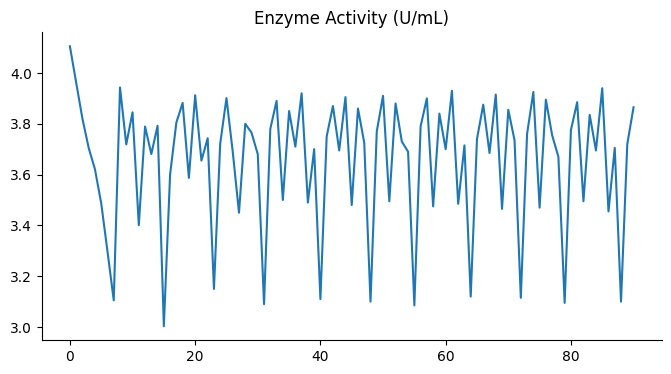

In [ ]:
# @title Enzyme Activity (U/mL)

from matplotlib import pyplot as plt
df['Enzyme Activity (U/mL)'].plot(kind='line', figsize=(8, 4), title='Enzyme Activity (U/mL)')
plt.gca().spines[['top', 'right']].set_visible(False)

In [ ]:
# Display column names and their data types
print("Column Names and Data Types:")
display(df.info())

# Display summary statistics for numerical columns
print("\nSummary Statistics:")
display(df.describe())

Column Names and Data Types:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 91 entries, 0 to 90
Data columns (total 5 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Isolate                     91 non-null     object 
 1   Temperature (øC)            91 non-null     int64  
 2   pH                          91 non-null     int64  
 3   Starch Concentration (g/L)  91 non-null     int64  
 4   Enzyme Activity (U/mL)      91 non-null     float64
dtypes: float64(1), int64(3), object(1)
memory usage: 3.7+ KB


None


Summary Statistics:


,Temperature (øC),pH,Starch Concentration (g/L),Enzyme Activity (U/mL)
count,91.000000,91.000000,91.0,91.000000
mean,43.406593,6.274725,15.0,3.659165
std,7.486251,0.448849,0.0,0.257673
min,35.000000,6.000000,15.0,3.003000
25%,35.000000,6.000000,15.0,3.495000
50%,50.000000,6.000000,15.0,3.722000
75%,50.000000,7.000000,15.0,3.852500
max,50.000000,7.000000,15.0,4.105000


# **Exploratory Data Analysis (EDA)**
Visualize the relationships between the features (Temperature, pH, Starch Concentration, Isolate) and the target variable (Enzyme Activity) using the combined data. This can include scatter plots, box plots, or pair plots.


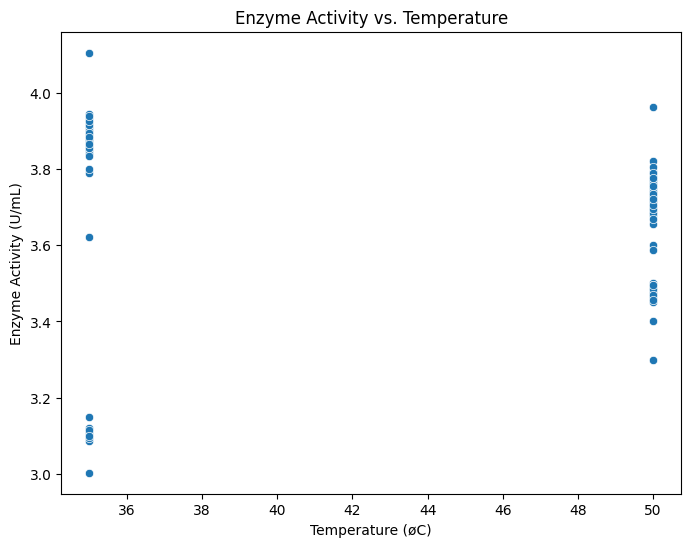

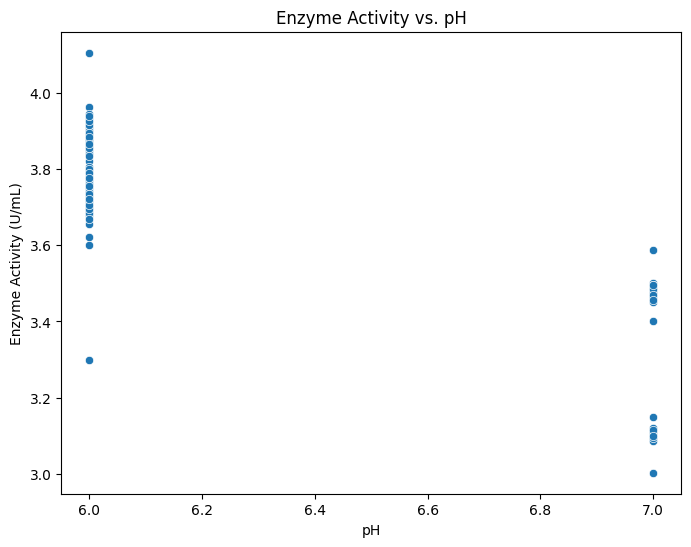

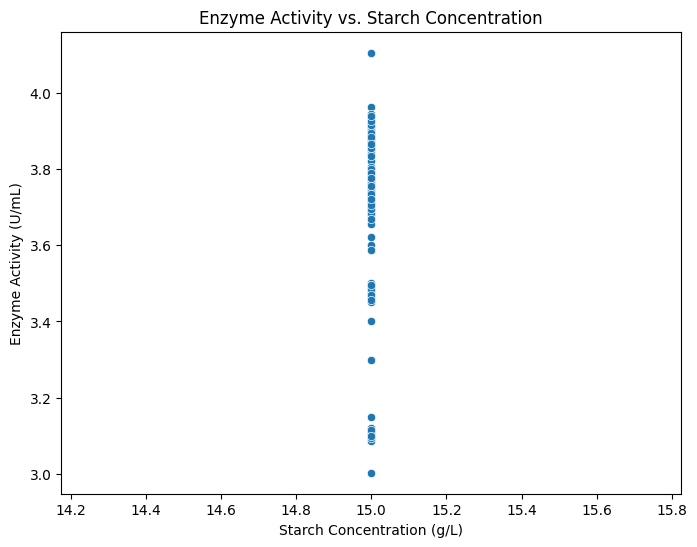

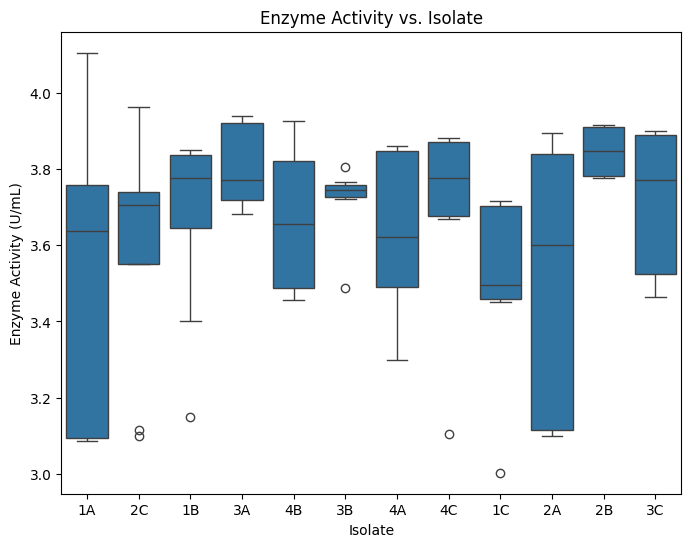

In [ ]:
# Visualize the relationship between Temperature and Enzyme Activity
plt.figure(figsize=(8, 6))
sns.scatterplot(x='Temperature (øC)', y='Enzyme Activity (U/mL)', data=df)
plt.title('Enzyme Activity vs. Temperature')
plt.show()

# Visualize the relationship between pH and Enzyme Activity
plt.figure(figsize=(8, 6))
sns.scatterplot(x='pH', y='Enzyme Activity (U/mL)', data=df)
plt.title('Enzyme Activity vs. pH')
plt.show()

# Visualize the relationship between Starch Concentration and Enzyme Activity
plt.figure(figsize=(8, 6))
sns.scatterplot(x='Starch Concentration (g/L)', y='Enzyme Activity (U/mL)', data=df)
plt.title('Enzyme Activity vs. Starch Concentration')
plt.show()

# Visualize the relationship between Isolate and Enzyme Activity
plt.figure(figsize=(8, 6))
sns.boxplot(x='Isolate', y='Enzyme Activity (U/mL)', data=df)
plt.title('Enzyme Activity vs. Isolate')
plt.show()

The visualizations provide some insights into the relationships between the variables. Based on these plots, particularly the box plot for 'Isolate', it seems that different isolates might have different enzyme activities

# **Feature engineering**
 Since 'Isolate' is a categorical variable and we want to use it in a regression model, we apply one-hot encoding to convert it into a numerical format.

In [ ]:
# Apply one-hot encoding to the 'Isolate' column
df_encoded = pd.get_dummies(df, columns=['Isolate'], drop_first=True)

# Display the first few rows of the encoded DataFrame
print("DataFrame after One-Hot Encoding:")
display(df_encoded.head())

DataFrame after One-Hot Encoding:


,Temperature (øC),pH,Starch Concentration (g/L),Enzyme Activity (U/mL),Isolate_1B,Isolate_1C,Isolate_2A,Isolate_2B,Isolate_2C,Isolate_3A,Isolate_3B,Isolate_3C,Isolate_4A,Isolate_4B,Isolate_4C
0,35,6,15,4.105,False,False,False,False,False,False,False,False,False,False,False
1,50,6,15,3.962,False,False,False,False,True,False,False,False,False,False,False
2,50,6,15,3.820,True,False,False,False,False,False,False,False,False,False,False
3,50,6,15,3.705,False,False,False,False,False,True,False,False,False,False,False
4,35,6,15,3.621,False,False,False,False,False,False,False,False,False,True,False


# **Model selection**
We need to choose an appropriate model for predicting enzyme activity based on the features. A linear regression model, which we will use, is a good starting point, but other models like polynomial regression or tree-based models could also be considered.

# **Model training**

We need to split the data into features (X) and the target variable (y), and then split these into training and testing sets, instantiate a Linear Regression model, and train the model on the training data.

In [ ]:
# Define features (X) and target variable (y)
X = df_encoded.drop('Enzyme Activity (U/mL)', axis=1)
y = df_encoded['Enzyme Activity (U/mL)']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("Training and testing data splits created.")
print("Shape of X_train:", X_train.shape)
print("Shape of X_test:", X_test.shape)
print("Shape of y_train:", y_train.shape)
print("Shape of y_test:", y_test.shape)

Training and testing data splits created.
Shape of X_train: (72, 14)
Shape of X_test: (19, 14)
Shape of y_train: (72,)
Shape of y_test: (19,)


In [ ]:
# Initialize and train the Linear Regression model
model = LinearRegression()
model.fit(X_train, y_train)

print("Linear Regression model trained successfully.")

Linear Regression model trained successfully.


# **Model evaluation**
Using the trained model, we make predictions on the test set, calculate the MSE and R² scores, print them, and create plots to visualize actual vs predicted values.

In [ ]:
# Make predictions on the testing data
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error (MSE): {mse:.4f}")
print(f"R-squared (R²): {r2:.4f}")

Mean Squared Error (MSE): 0.0245
R-squared (R²): 0.7016


# **Model interpretation**

Interpret the trained model to understand the impact of each feature on enzyme activity.

We access and print the coefficients and intercept of the trained linear regression model and interpret their meaning

In [ ]:
# Display the model's coefficients
print("Model Coefficients:")
display(pd.DataFrame({'Feature': X.columns, 'Coefficient': model.coef_}).sort_values(by='Coefficient', ascending=False))

Model Coefficients:


,Feature,Coefficient
12,Isolate_4B,1.550234e-01
10,Isolate_3C,1.227567e-01
6,Isolate_2B,9.763943e-02
8,Isolate_3A,6.529580e-02
11,Isolate_4A,5.652078e-02
9,Isolate_3B,4.088274e-02
4,Isolate_1C,3.375234e-02
3,Isolate_1B,3.342720e-02
2,Starch Concentration (g/L),6.245005e-17
0,Temperature (øC),-5.351382e-04


from matplotlib import pyplot as plt
_df_0['index'].plot(kind='hist', bins=20, title='index')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_1['Coefficient'].plot(kind='hist', bins=20, title='Coefficient')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_2.plot(kind='scatter', x='index', y='Coefficient', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_3['index'].plot(kind='line', figsize=(8, 4), title='index')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_4['Coefficient'].plot(kind='line', figsize=(8, 4), title='Coefficient')
plt.gca().spines[['top', 'right']].set_visible(False)

# **Prediction**
 We generated a scatter plot showing the actual vs. predicted enzyme activity on the test set. This visualization demonstrates how well the model predicts enzyme activity.

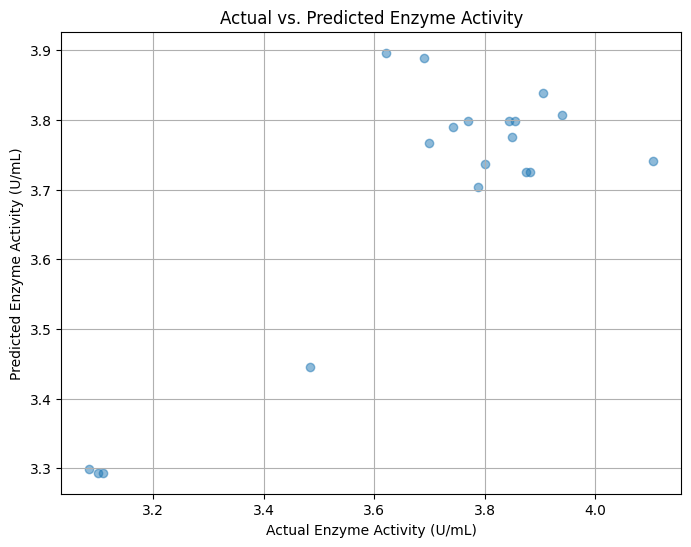

In [ ]:
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.xlabel("Actual Enzyme Activity (U/mL)")
plt.ylabel("Predicted Enzyme Activity (U/mL)")
plt.title("Actual vs. Predicted Enzyme Activity")
plt.grid(True)
plt.show()

# **3D Surface Plot: Enzyme Activity vs Temperature and pH**
 We generate a 3D surface plot to visualize how Enzyme Activity changes with Temperature and pH. This will give us a better sense of their combined effect. This visualization helps in understanding the relationship between these three variables in a three-dimensional space.

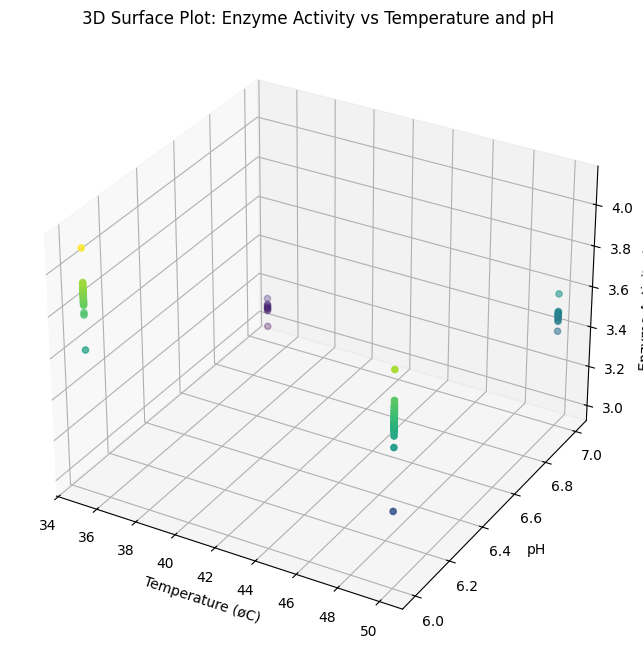

In [ ]:
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# Assuming 'Temperature (øC)', 'pH', and 'Enzyme Activity (U/mL)' are the column names
x = df['Temperature (øC)']
y = df['pH']
z = df['Enzyme Activity (U/mL)']

ax.scatter(x, y, z, c=z, cmap='viridis', marker='o')

ax.set_xlabel('Temperature (øC)')
ax.set_ylabel('pH')
ax.set_zlabel('Enzyme Activity (U/mL)')
ax.set_title('3D Surface Plot: Enzyme Activity vs Temperature and pH')

plt.show()

In [ ]:
# Group by 'Isolate' and calculate the range of 'Enzyme Activity (U/mL)'
isolate_activity_range = df.groupby('Isolate')['Enzyme Activity (U/mL)'].agg(lambda x: x.max() - x.min()).reset_index()

# Rename the aggregated column for clarity
isolate_activity_range.rename(columns={'Enzyme Activity (U/mL)': 'Activity Range (U/mL)'}, inplace=True)

# Display the results
print("Enzyme Activity Range Across Isolates:")
display(isolate_activity_range.sort_values(by='Activity Range (U/mL)', ascending=False))

Enzyme Activity Range Across Isolates:


,Isolate,Activity Range (U/mL)
0,1A,1.020
5,2C,0.862
3,2A,0.795
11,4C,0.777
2,1C,0.712
1,1B,0.700
9,4A,0.562
10,4B,0.470
8,3C,0.435
7,3B,0.318


from matplotlib import pyplot as plt
_df_5['index'].plot(kind='hist', bins=20, title='index')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_6['Activity Range (U/mL)'].plot(kind='hist', bins=20, title='Activity Range (U/mL)')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_7.plot(kind='scatter', x='index', y='Activity Range (U/mL)', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_8['index'].plot(kind='line', figsize=(8, 4), title='index')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_9['Activity Range (U/mL)'].plot(kind='line', figsize=(8, 4), title='Activity Range (U/mL)')
plt.gca().spines[['top', 'right']].set_visible(False)

# **Conclusion**
## **Summary of Analysis:**


**Data Loading and Preparation**: We
successfully loaded the enzyme activity.csv dataset and performed initial data inspection, including checking data types and summary statistics. We identified that 'Starch Concentration (g/L)' had a constant value.

**Exploratory Data Analysis (EDA)**: We visualized the relationships between 'Temperature (øC)', 'pH', 'Starch Concentration (g/L)', 'Isolate', and 'Enzyme Activity (U/mL)'. The plots suggested that 'Temperature', 'pH', and 'Isolate' might influence enzyme activity, while 'Starch Concentration' did not show variation in this dataset.

**Feature Engineering:** We applied one-hot encoding to the categorical 'Isolate' column to prepare it for the regression model.

**Model Selection and Training**: We selected and trained a Linear Regression model to predict 'Enzyme Activity (U/mL)' based on the features.

**Model Evaluation:** We evaluated the model's performance using Mean Squared Error (MSE) and R-squared (R²) on the test set.

**Model Interpretation**: We examined the model's coefficients to understand the estimated impact of each feature on enzyme activity. 'pH' and some 'Isolate' variations appeared to have the most significant influence.

**Prediction Visualization**: We generated a scatter plot to visualize the actual versus predicted enzyme activity values on the test set.

**3D Visualization**: We created a 3D scatter plot to show the relationship between 'Enzyme Activity (U/mL)', 'Temperature (øC)', and 'pH'.

**Isolate Activity Range Analysis**: We calculated and displayed the range of enzyme activity within each isolate.

## **Potential Next Steps:**

1. Consider alternative models: While Linear Regression provided a starting point, exploring other models like polynomial regression, tree-based models (e.g., Decision Trees, Random Forests), or even more complex models could potentially improve prediction accuracy.

2. Investigate outliers: Examine any data points that appear to be outliers in the visualizations (e.g., in the actual vs. predicted plot or the 3D plot) to understand if they are valid data points or errors.

3. Collect data with varying starch concentrations: If understanding the impact of starch concentration is important, collecting data with different substrate levels would be necessary to analyze its effect.

4. Perform cross-validation: Use cross-validation techniques to get a more robust estimate of the model's performance and ensure it generalizes well to unseen data.
